# Web Mining and Applied NLP (44-620)

## Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

### Student Name: Alison Hatfield
### GitHub: https://github.com/ajhatfield/web-scraping

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

In [23]:
# Create and activate a Python virtual environment. 
# Before starting the project, try all these imports FIRST
# Address any errors you get running this code cell 
# by installing the necessary packages into your active Python environment.
# Try to resolve issues using your materials and the web.
# If that doesn't work, ask for help in the discussion forums.
# You can't complete the exercises until you import these - start early! 
# We also import pickle and Counter (included in the Python Standard Library).

from collections import Counter
import pickle
import requests
import spacy
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

!pip list

print('All prereqs installed.')

Package            Version
------------------ -----------
annotated-types    0.6.0
appnope            0.1.4
asttokens          2.4.1
beautifulsoup4     4.12.3
blis               0.7.11
bs4                0.0.2
catalogue          2.0.10
certifi            2024.2.2
charset-normalizer 3.3.2
click              8.1.7
cloudpathlib       0.16.0
comm               0.2.2
confection         0.1.4
contourpy          1.2.1
cycler             0.12.1
cymem              2.0.8
debugpy            1.8.1
decorator          5.1.1
en-core-web-sm     3.7.1
executing          2.0.1
fonttools          4.51.0
idna               3.7
ipykernel          6.29.4
ipython            8.23.0
jedi               0.19.1
Jinja2             3.1.3
jupyter_client     8.6.1
jupyter_core       5.7.2
kiwisolver         1.4.5
langcodes          3.3.0
MarkupSafe         2.1.5
matplotlib         3.8.4
matplotlib-inline  0.1.6
murmurhash         1.0.10
nest-asyncio       1.6.0
numpy              1.26.4
packaging          24.0
parso 

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [24]:
#import required packages
import requests
import pickle
from bs4 import BeautifulSoup

#set URL / varibles
url = "https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/"
#Get URL
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
article = str(soup.find("article"))
filename = "article.pkl"

with open(filename, "wb") as file:
    pickle.dump(article, file)

print(f'The article was successfully extracted to {filename}')

The article was successfully extracted to article.pkl


2. Read in your article's html source from the file you created in question 1 and print it's text (use `.get_text()`)

In [25]:
with open("article.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()

print(text)



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [26]:
#import packages that have not yet been imported
import spacy
from collections import Counter
from spacy.lang.en.stop_words import STOP_WORDS

with open("article.pkl", "rb") as file:
    article_html = pickle.load(file)

soup = BeautifulSoup(article_html, "html.parser")
text = soup.get_text()
nlp = spacy.load("en_core_web_sm")
document = nlp(text)
tokens = [token.text.lower() for token in document if token.is_alpha and token.text.lower() not in STOP_WORDS]

#Count the number of tokens
counter = Counter(tokens)

#Get top 5 by number of tokens
top_5_tokens = counter.most_common(5)

#Print top 5 most common tokens with thier frequency 
print("The top 5 most frequent tokens are:")
for token, frequency in top_5_tokens:
    print(f'{token}, {frequency}')
    
#Print all tokens with their frequency 
print("\nAll the tokens and their frequency are:")
for token, frequency in counter.items():
    print(f'{token}, {frequency}')

The top 5 most frequent tokens are:
laser, 35
headlights, 19
headlight, 11
technology, 10
led, 10

All the tokens and their frequency are:
laser, 35
headlights, 19
work, 2
comments, 1
lewin, 1
day, 3
march, 2
think, 1
onward, 1
automotive, 6
technology, 10
usually, 1
thing, 2
come, 5
mind, 3
engines, 1
fuel, 1
efficiency, 3
switch, 2
electric, 1
power, 3
mean, 1
thousands, 1
engineers, 2
world, 2
working, 1
improve, 1
state, 2
art, 1
lighting, 4
sealed, 2
beam, 7
gave, 1
way, 4
modern, 2
designs, 3
regulations, 1
loosened, 1
bulbs, 1
moved, 2
simple, 3
halogens, 1
xenon, 1
hids, 1
recently, 1
leds, 6
new, 3
scene, 1
lasers, 5
bwm, 2
prototype, 1
headlight, 11
assemblies, 1
undergoing, 1
testing, 1
image, 2
brought, 1
phrase, 1
beams, 5
firing, 1
automobile, 1
obviously, 1
coherent, 1
monochromatic, 1
light, 9
poor, 1
illumination, 2
outside, 1
specific, 1
spot, 2
distance, 1
away, 1
thankfully, 2
eyes, 1
instead, 1
consist, 1
solid, 1
diodes, 2
mounted, 1
inside, 3
blue, 1
fired, 1
yel

4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [27]:
#load in article
with open('article.pkl', 'rb') as file:
    article_html = pickle.load(file)
    
soup = BeautifulSoup(article_html, 'html.parser')
text = soup.get_text()
nlp = spacy.load("en_core_web_sm")
document = nlp(text)

#Removing punctuiation, whitespace, lemmatize tokens, and stop words. 
lemmas = [token.lemma_.lower() for token in document if token.is_alpha and token.lemma_.lower() not in STOP_WORDS]

counter = Counter(lemmas)

top_5_lemmas = counter.most_common(5)

#Print top 5 most common lemmas with thier frequency 
print("The top 5 most frequent lemmas are:")
for lemma, frequency in top_5_lemmas:
    print(f'{lemma}, {frequency}')
    
#Print all lemmas with their frequency 
print("\nAll the lemmas and their frequency are:")
for lemma, frequency in counter.items():
    print(f'{lemma}, {frequency}')

The top 5 most frequent lemmas are:
laser, 40
headlight, 28
beam, 12
technology, 10
light, 10

All the lemmas and their frequency are:
laser, 40
headlights, 2
work, 3
comments, 1
lewin, 1
day, 4
march, 2
think, 1
onward, 1
automotive, 6
technology, 10
headlight, 28
usually, 1
thing, 3
come, 7
mind, 3
engine, 1
fuel, 1
efficiency, 3
switch, 2
electric, 1
power, 3
mean, 2
thousand, 1
engineer, 2
world, 2
improve, 1
state, 2
art, 1
lighting, 4
seal, 1
beam, 12
way, 4
modern, 2
design, 6
regulation, 1
loosen, 1
bulb, 1
simple, 3
halogen, 1
xenon, 1
hids, 1
recently, 1
led, 7
new, 3
scene, 1
bwm, 2
prototype, 1
assembly, 2
undergo, 1
testing, 1
image, 2
bring, 2
phrase, 1
fire, 2
automobile, 2
obviously, 1
coherent, 1
monochromatic, 1
light, 10
poor, 1
illumination, 2
outside, 1
specific, 1
spot, 2
distance, 1
away, 1
thankfully, 2
eye, 1
instead, 1
consist, 1
solid, 1
diode, 5
mount, 1
inside, 3
blue, 1
yellow, 1
phosphor, 3
similar, 1
use, 9
white, 2
produce, 1
powerful, 2
vibrant, 1
boun

5. Define the following methods:
    * `score_sentence_by_token(sentence, interesting_token)` that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
    * `score_sentence_by_lemma(sentence, interesting_lemmas)` that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
    
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well).  Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [38]:
import re

def score_sentence_by_token(sentence, interesting_token):
    tokens = re.findall(r'\b\w+(?:\'\w+)?\b', sentence)
    score = sum(1 for token in tokens if token.lower() in interesting_token) / len(token)
    return score
def score_sentence_by_lemma(sentence, interesting_lemmas):
    document = nlp(sentence)
    lemmas = re.findall(r'\b\w+(?:\'\w+)?\b', sentence)
    score = sum(1 for lemma in lemmas if lemma in interesting_lemmas) / len(lemmas)
    return score

first_sentence = "When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind."
interesting_token_list = ['laser', 'headlights', 'headlight','technology', 'led']
interesting_lemmas_list = ['laser', 'headlight', 'beam','technology','light']


token_score = score_sentence_by_token(first_sentence, interesting_token_list)
lemmas_score = score_sentence_by_lemma(first_sentence, interesting_lemmas_list)

print(f'Token Score: {token_score}')
print(f'Lemma Score: {lemmas_score}')

Token Score: 0.16666666666666666
Lemma Score: 0.047619047619047616


6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

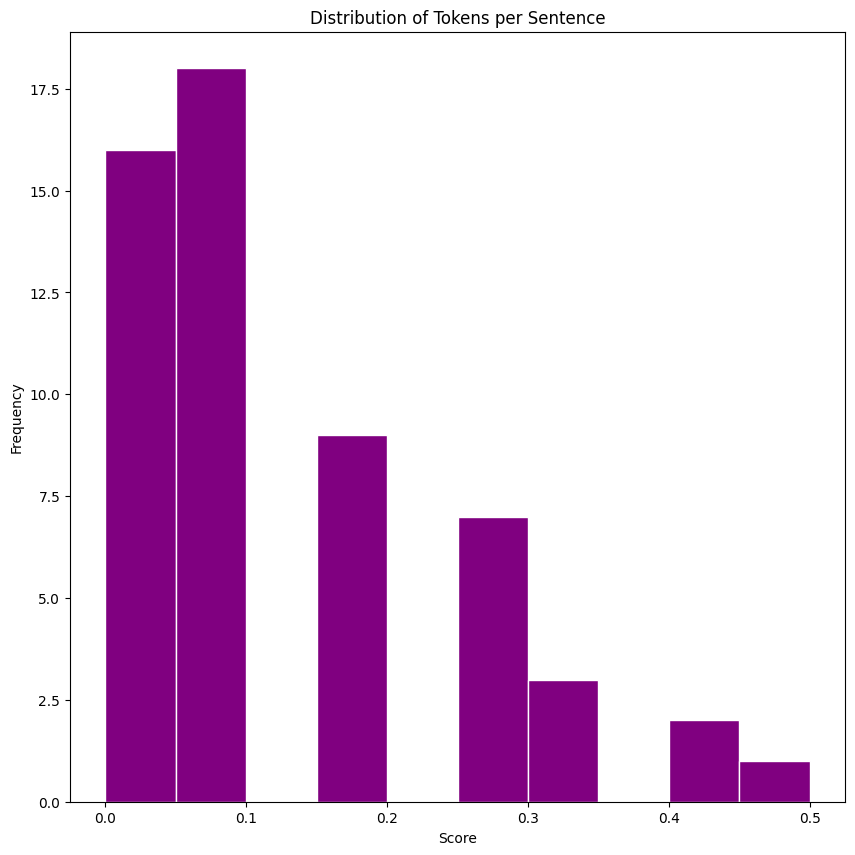

In [34]:
import matplotlib.pyplot as plt
import nltk


sentences = nltk.sent_tokenize(text)
token_scores = [score_sentence_by_token(sentence, [token.lower() for token, _ in top_5_tokens]) for sentence in sentences if sentence.strip()]

#plot histogram
plt.figure(figsize = (10,10))
plt.hist(token_scores, bins = 10, color = 'purple', edgecolor = 'white')
plt.title('Distribution of Tokens per Sentence')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### The highest freuqnecy of scores is between 0.0 and 0.1

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

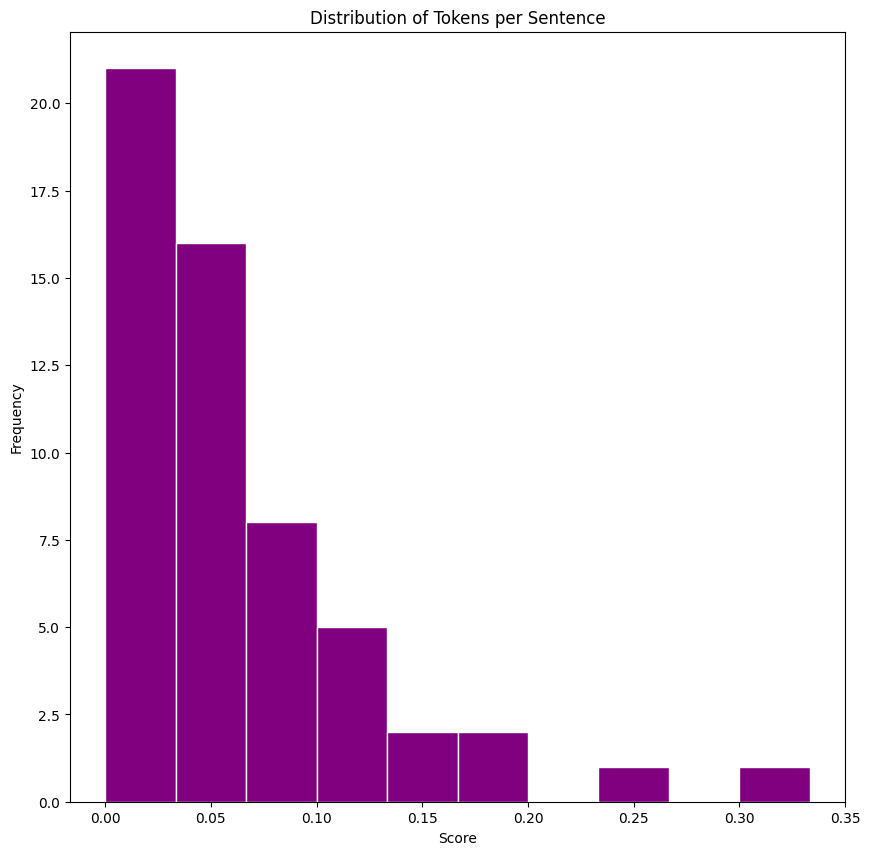

In [39]:
sentences = nltk.sent_tokenize(text)
lemma_scores = [score_sentence_by_lemma(sentence, [lemma.lower() for lemma, _ in top_5_lemmas]) for sentence in sentences if sentence.strip()]

#plot histogram
plt.figure(figsize = (10,10))
plt.hist(lemma_scores, bins = 10, color = 'purple', edgecolor = 'white')
plt.title('Distribution of Tokens per Sentence')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

### The most common lemma score is bewteen 0.00 and 0.75

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words?  How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

It would be very similar to the way we obmitted white spaces and punctuation in questions 3 and 4. We would filter out the non-noun tokens and lemmas so we would just be analyzing the nouns using an if statement. We would use the part of speech tag within SpaCy in order to help us do this. An example of how I would do this is below.

Question 3 ex:

interesting_tokens = [token.text.lower() for token in document if important_token(token) and token.pos_ = 'NOUN']

I believe it would be very similar for lemmas. We would still need to use tokens to see if it is a noun. 

Question 4 ex:

interesting_lemmas = [token.lemma.lower() for token in document if important_token(token) and token.pos_ = 'NOUN']

In [40]:
!jupyter nbconvert --to html web-scraping.ipynb

[NbConvertApp] Converting notebook web-scraping.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 381757 bytes to web-scraping.html
